## Importing all the files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import warnings
import seaborn as sns

## Reading the csv file

In [2]:
data = pd.read_csv('Pulsar_cleaned.csv')
data.head()

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,1.502969,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,0.788423,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,0.323558,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,0.958983,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,1.232198,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Shape, information, and Related feature of dataset

In [3]:
data.shape

(14987, 8)

In [4]:
data.size

119896

In [5]:
data.describe()

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,14987.000000,14987.000000,14987.000000,14987.000000,14987.000000,14987.000000,14987.000000,14987.000000
mean,115.941758,0.768933,0.389529,3.775272,20.419064,8.965458,106.490589,0.020551
std,16.790736,0.639350,0.880771,4.052198,9.324754,3.100184,72.938789,0.141881
min,39.976562,0.000038,-1.207550,0.650502,9.956068,-0.649044,-1.630794,0.000000
25%,104.734375,0.296824,-0.201098,1.890886,14.285618,6.941751,53.175677,0.000000
50%,116.554688,0.636305,0.148028,2.600334,17.478642,8.832803,92.117154,0.000000
75%,127.617188,1.080049,0.697814,3.896739,23.119246,10.813328,142.364947,0.000000
max,186.023438,6.335349,4.238586,79.635452,62.141842,18.535485,364.501595,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14987 entries, 0 to 14986
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       14987 non-null  float64
 1   EK                    14987 non-null  float64
 2   Skewness              14987 non-null  float64
 3   Mean_DMSNR_Curve      14987 non-null  float64
 4   SD_DMSNR_Curve        14987 non-null  float64
 5   EK_DMSNR_Curve        14987 non-null  float64
 6   Skewness_DMSNR_Curve  14987 non-null  float64
 7   Class                 14987 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 936.8 KB


## Checking the null value in the datasets using pandas functions

In [8]:
data.isnull().sum()

Mean_Integrated         0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

## Conclusion :  All the data is clean ready to use Machine learning algos

lets try some graph like heatmap for correlation matrix, pairplot

<Axes: >

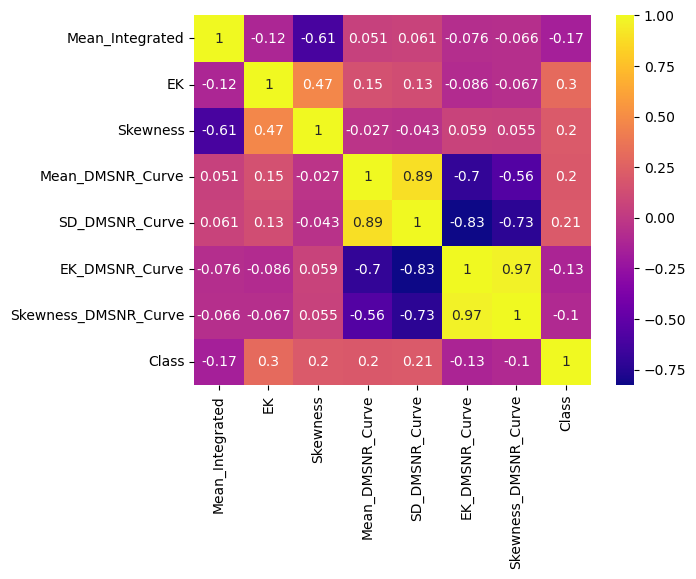

In [88]:
sns.heatmap(data.corr(),annot = True,cmap='plasma')

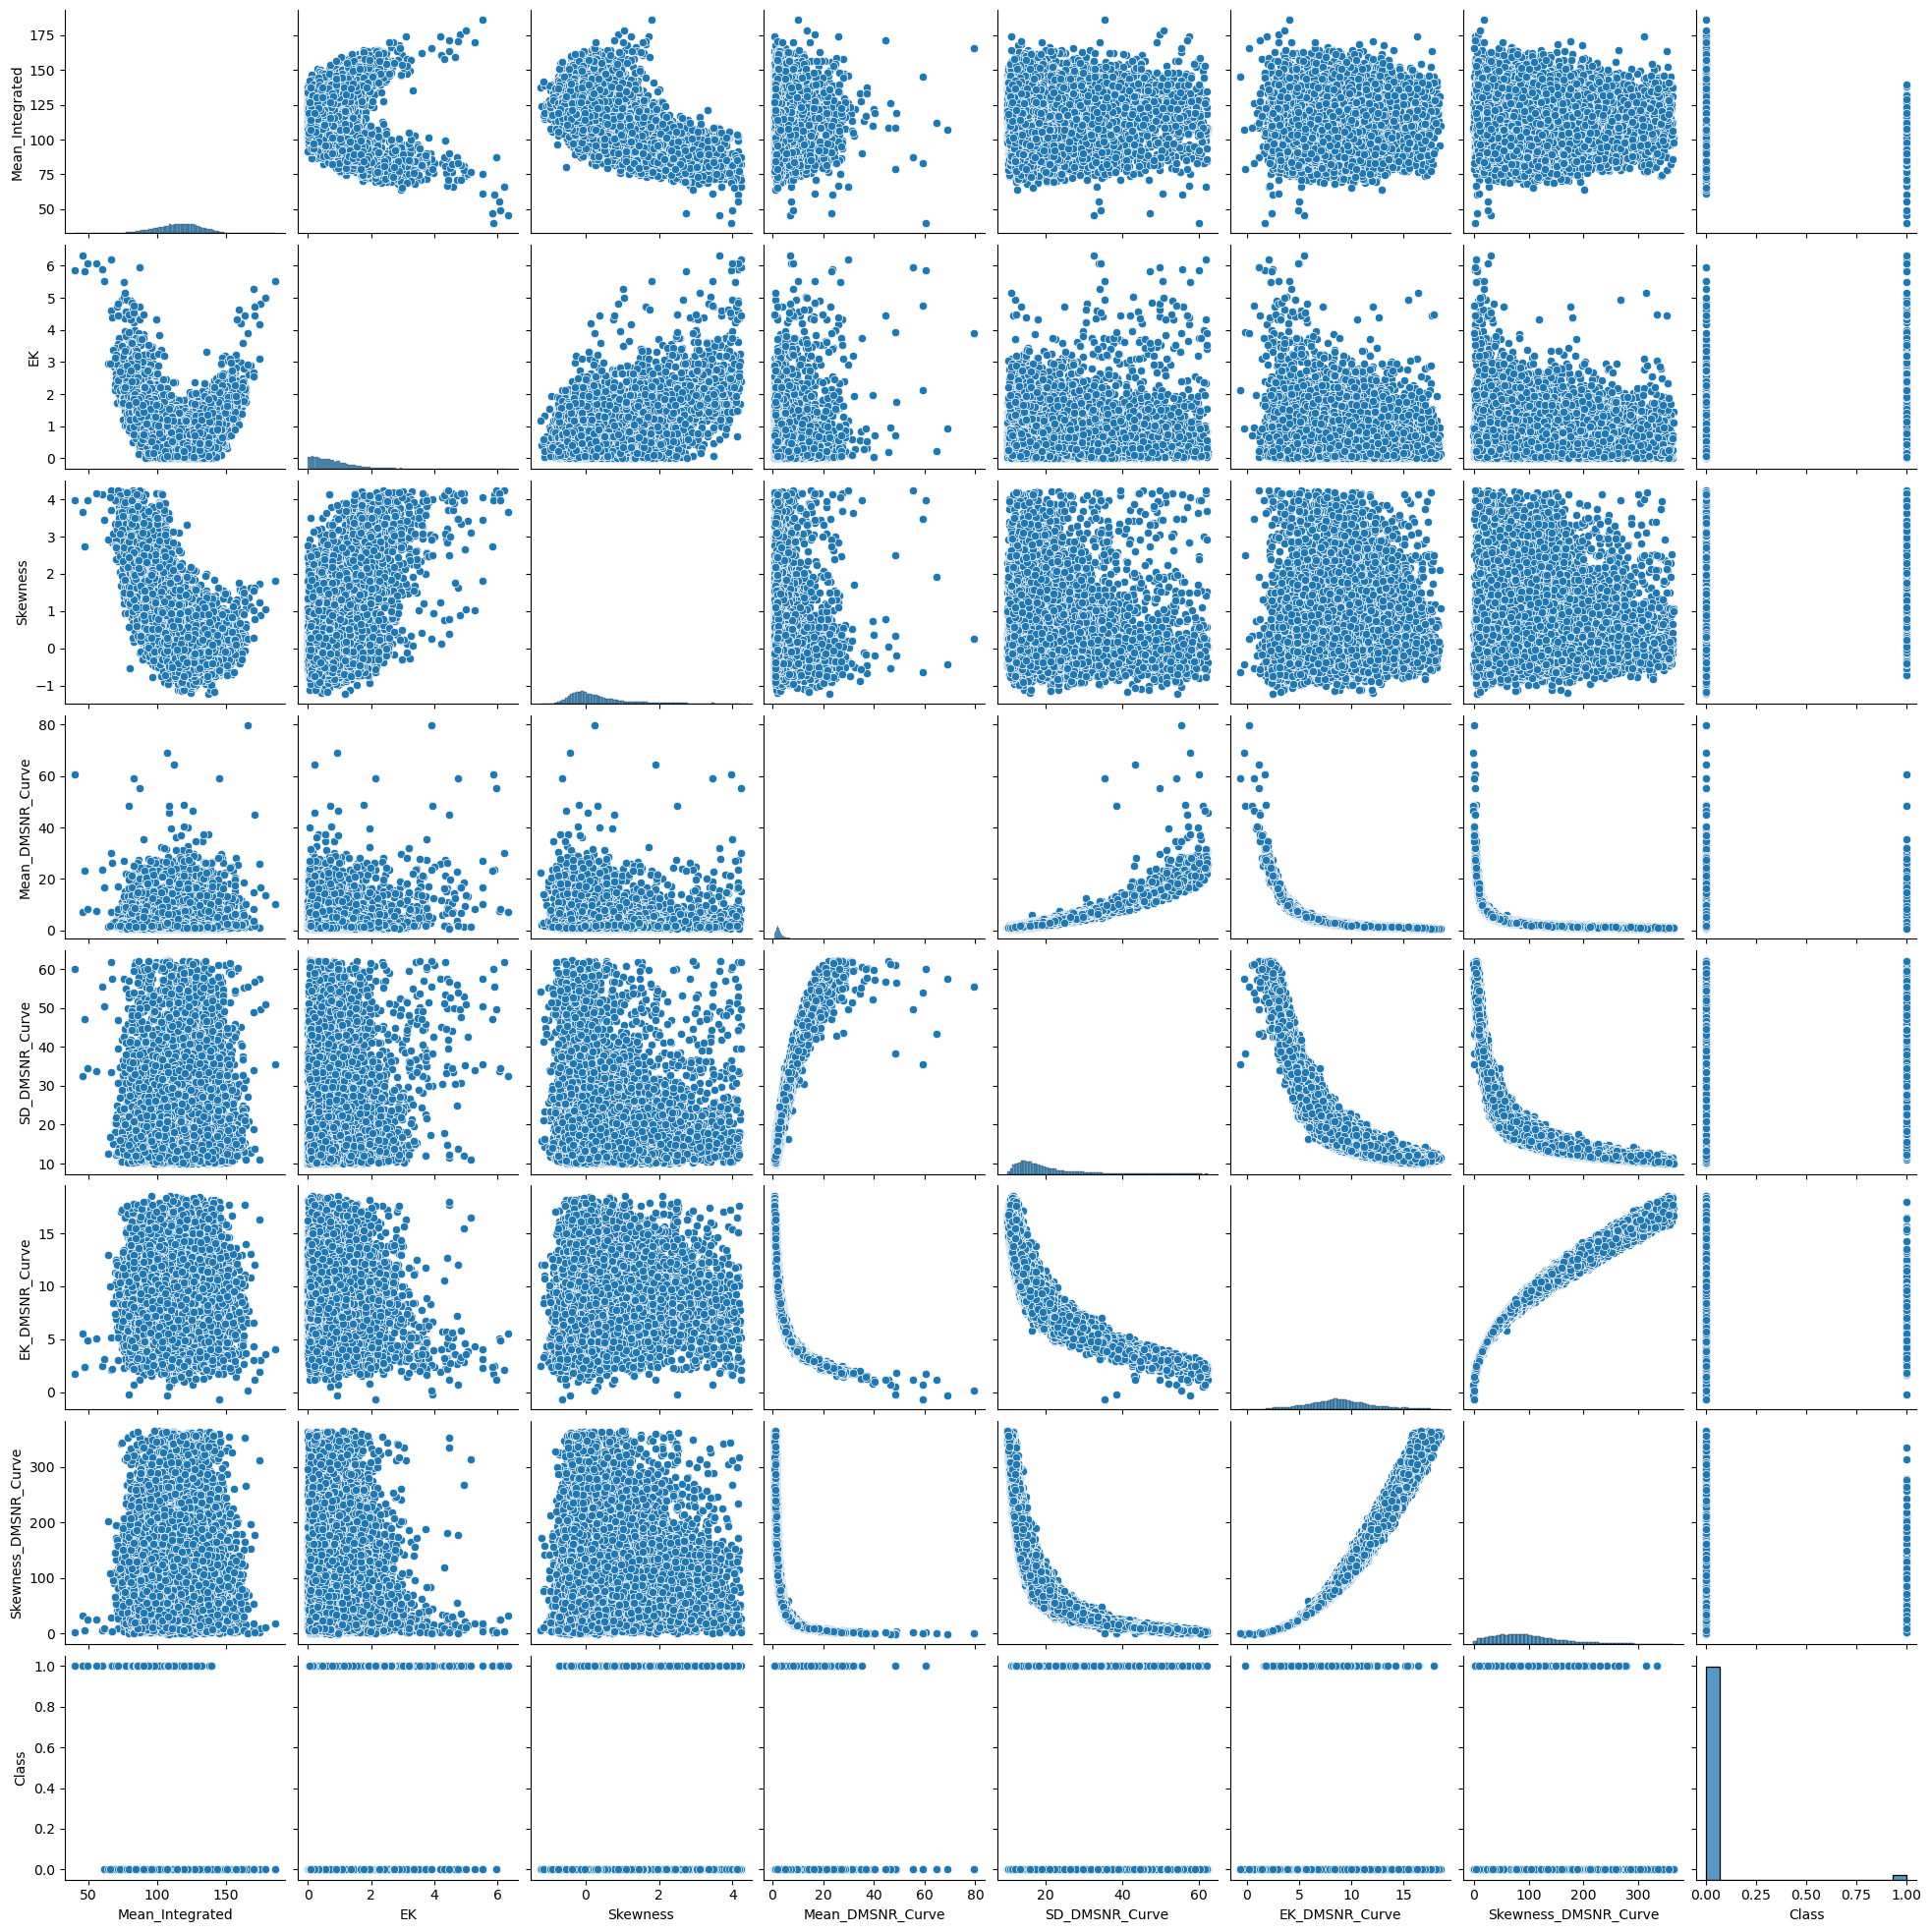

In [13]:
sns.pairplot(data)

In [14]:
data.tail().T

,14982,14983,14984,14985,14986
Mean_Integrated,96.000000,136.429688,122.554688,119.335938,114.507812
EK,0.537495,1.349991,0.316006,0.213253,0.076409
Skewness,0.281344,-0.738123,0.323061,-0.743025,-0.024789
Mean_DMSNR_Curve,1.871237,1.296823,16.409699,21.430602,1.946488
SD_DMSNR_Curve,15.833746,12.166062,44.626893,58.872000,13.381731
EK_DMSNR_Curve,9.634927,15.450260,2.945244,2.499517,10.007967
Skewness_DMSNR_Curve,104.821623,285.931022,8.297092,4.595173,134.238910
Class,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
data['Class'].value_counts()

0    14679
1      308
Name: Class, dtype: int64

## importing all the sklearn module for making models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

## Spliting the data into training and testing phase and making predicting using machine learning techniques

In [21]:
x = data.drop('Class',axis=1)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((11989, 7), (2998, 7), (2998,), (11989,))

## Making models form here

1)Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_preds_lr = lr.predict(x_test)
print(accuracy_score(y_test,y_preds_lr)*100)

98.26551034022681


 Using grid search cv

In [34]:
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter':[500,1000,1500,2000,5000,6000,10000,12000]
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_lr.fit(x_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
warnings.filterwarnings('ignore')

Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}


In [35]:
print("Best Score for Logistic Regression:", grid_search_lr.best_score_*100)

Best Score for Logistic Regression: 98.47360980486103


2)DecisionTree

In [37]:
%%time
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preds_dt = dt.predict(x_test)
print(accuracy_score(y_test,y_preds_dt)*100)

97.53168779186124
CPU times: total: 188 ms
Wall time: 237 ms


using grid search cv 

In [38]:
%%time
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(x_train, y_train)

print("Best Parameters for Decision Tree", grid_search_dt.best_params_)
warnings.filterwarnings('ignore')

Best Parameters for Decision Tree {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
CPU times: total: 19.3 s
Wall time: 28.4 s


In [40]:
print("Best Score for Decision Tree", grid_search_dt.best_score_*100)

Best Score for Decision Tree 98.42356114450821


3)Random Forest

In [41]:
%%time
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_preds_rf = rf.predict(x_test)
print(accuracy_score(y_test,y_preds_rf)*100)

98.36557705136758
CPU times: total: 3.66 s
Wall time: 5.21 s


using grid search cv

4)Support Vector Machine

In [45]:
%%time
svm = SVC()
svm.fit(x_train,y_train)
y_preds_svm = svm.predict(x_test)
print(accuracy_score(y_test,y_preds_svm)*100)

97.69846564376252
CPU times: total: 1 s
Wall time: 1.37 s


5)KNearestneighbours

In [46]:
%%time
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_preds_knn = knn.predict(x_test)
print(accuracy_score(y_test,y_preds_knn)*100)

97.99866577718478
CPU times: total: 125 ms
Wall time: 237 ms


In [48]:
accuracyOfKnn = []
for i in range(1,22):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_preds_knn = knn.predict(x_test)
    print(accuracy_score(y_test,y_preds_knn)*100)
    accuracyOfKnn.append(accuracy_score(y_test,y_preds_knn)*100)

97.1314209472982
97.89859906604403
97.96531020680453
97.93195463642428
97.99866577718478
97.86524349566378
98.03202134756505
97.83188792528352
97.83188792528352
97.86524349566378
97.86524349566378
97.79853235490327
97.79853235490327
97.73182121414277
97.83188792528352
97.83188792528352
97.79853235490327
97.79853235490327
97.765176784523
97.83188792528352
97.89859906604403


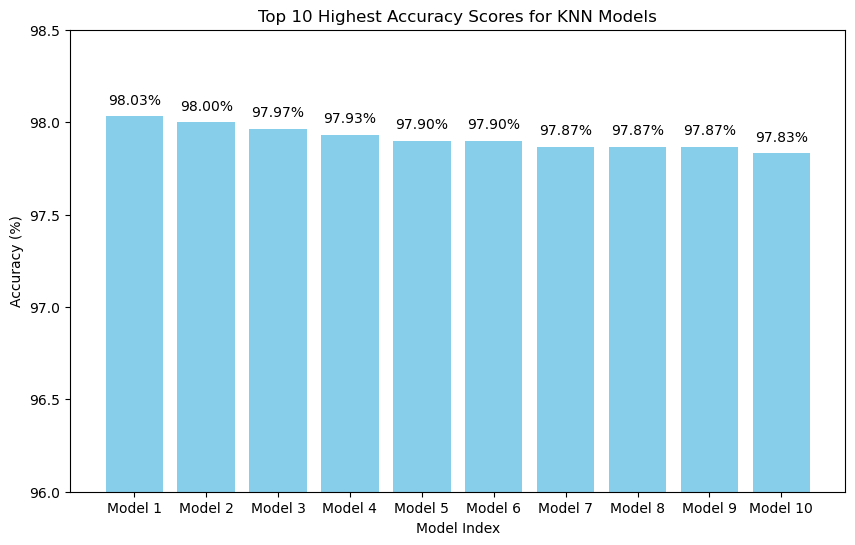

In [79]:
top_10_accuracies = sorted(accuracyOfKnn, reverse=True)[:10]
indices = np.arange(len(top_10_accuracies))
plt.figure(figsize=(10, 6))
bars = plt.bar(indices, top_10_accuracies, color='skyblue')
plt.xlabel('Model Index')
plt.ylabel('Accuracy (%)')
plt.title('Top 10 Highest Accuracy Scores for KNN Models')
plt.xticks(indices, [f'Model {i+1}' for i in indices])  # Assuming Model 1, Model 2, etc.
plt.ylim(96,98.5)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}%', ha='center', va='bottom')
plt.show()

In [69]:
data.head()

,Mean_Integrated,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,1.502969,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,0.788423,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,0.323558,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,0.958983,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,1.232198,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [73]:
accuracyOfAllModels={'SVM':97.69846564376252,'Decision tree':98.42356114450821,'Random Forest':98.36557705136758,'Logistic Regression':98.26551034022681,'KNN':97.99866577718478}

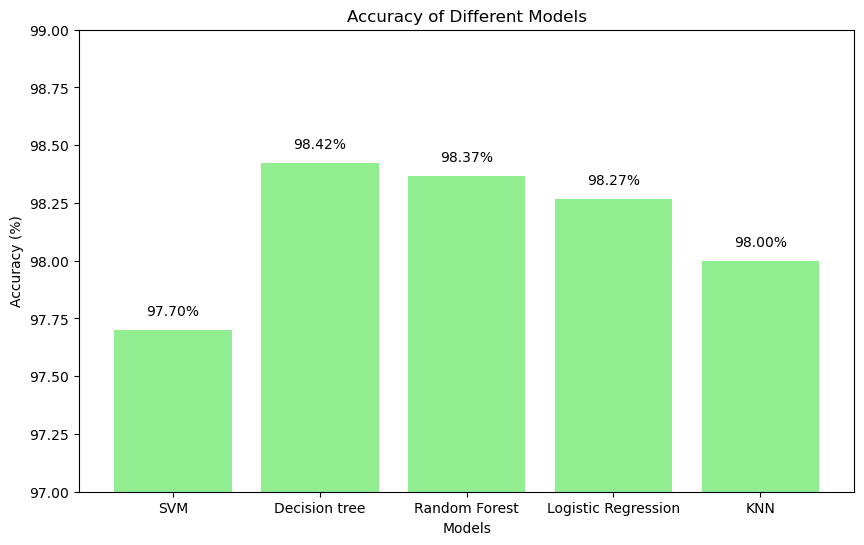

In [78]:
models = list(accuracyOfAllModels.keys())
accuracies = list(accuracyOfAllModels.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(97, 99)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}%', ha='center', va='bottom')
plt.show()

In [81]:
import plotly.express as px

In [86]:
class_target = data['Class'].value_counts()
fig = px.pie(data,names=class_target.index, values=class_target.values ,title='Target variable Distribution',hole=0.5)
fig.show()